## Install Libraries

In [1]:
!pip install jupyter-dash

# Import libraries

In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
from tempfile import template
from jupyter_dash import JupyterDash
from dash import dcc 
import dash_core_components as dcc
from dash import html 
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

# Load dataset

In [3]:
df = pd.read_csv('RiyadhVillasAqar.csv')
df.head(5)

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,0,شرقية,5,4.0,5+,20.0,1.0,0.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,1,غربية,4,3.0,5+,20.0,1.0,0.0,1.0,1.0,...,2.0,1.0,1.0,0.0,0.0,0.0,المهدية,غرب الرياض,3000000.0,5555.555556
2,2,جنوبية شرقية,7,2.0,5+,15.0,1.0,31.0,1.0,0.0,...,0,1.0,0.0,0.0,0.0,0.0,الشفا,جنوب الرياض,2000000.0,2285.714286
3,3,غربية,7,3.0,5+,15.0,1.0,3.0,0.0,1.0,...,0,1.0,0.0,1.0,0.0,0.0,ظهرة لبن,غرب الرياض,894000.0,4470.000000
4,4,شمالية,4,2.0,4,25.0,1.0,0.0,1.0,1.0,...,3.0,1.0,1.0,1.0,0.0,0.0,قرطبة,شرق الرياض,3500000.0,8750.000000


# EDA

In [65]:
df['furnihsed'].value_counts()

0.0    43139
1.0     3687
Name: furnihsed, dtype: int64

In [61]:
df.shape

(46826, 25)

In [6]:
df.describe()

,Unnamed: 0,rooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,maidRoom,elevator,furnihsed,pool,basement,price,square price
count,46826.000000,46826.000000,46636.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,4.682400e+04,46824.000000
mean,25915.132384,4.687439,18.158418,0.683979,2.454790,0.355871,0.466258,0.769380,0.979114,0.645112,0.907872,0.297698,380.021740,0.767821,0.235745,0.078738,0.116410,0.037671,2.347636e+06,6088.058800
std,14993.821359,1.104970,4.167866,0.464926,6.496833,0.478781,0.498866,0.421234,0.143004,0.478485,0.289210,0.457251,281.431272,0.422227,0.424468,0.269333,0.320719,0.190402,2.782053e+06,4515.845244
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.080000e+03,3.428571
25%,12925.250000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,270.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.180000e+06,3866.666667
50%,25836.500000,5.000000,20.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,312.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.600000e+06,5000.000000
75%,38917.750000,5.000000,20.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,400.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.600000e+06,7600.000000
max,51844.000000,7.000000,100.000000,1.000000,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+08,136144.578313


In [7]:
df.dtypes

Unnamed: 0         int64
front             object
rooms              int64
lounges           object
bathrooms         object
streetWidth      float64
stairs           float64
propertyAge      float64
driverRoom       float64
tent             float64
patio            float64
kitchen          float64
outdoorRoom      float64
garage           float64
duplex           float64
space              int64
apartments        object
maidRoom         float64
elevator         float64
furnihsed        float64
pool             float64
basement         float64
neighbourhood     object
location          object
price            float64
square price     float64
dtype: object

In [8]:
df['neighbourhood'].unique()

array([' عكاظ ', ' المهدية ', ' الشفا ', ' ظهرة لبن ', ' قرطبة ',
       ' السويدي ', ' الروضة ', ' القادسية ', ' بدر ',
       ' المدينة الصناعية الجديدة ', ' الجنادرية ', ' الفاخرية ',
       ' الشرق ', ' العارض ', ' الدار البيضاء ', ' الحمراء ', ' طويق ',
       ' احد ', ' النهضة ', ' الخليج ', ' اشبيلية ', ' الملك فيصل ',
       ' النسيم الغربي ', ' الرمال ', ' حطين ', ' الريان ', ' النرجس ',
       ' الحزم ', ' السلام ', ' طيبة ', 'ان مولى قريش ', ' الصحافة ',
       ' العزيزية ', ' الفلاح ', ' الملقا ', ' الرحمانية ', ' النرجس',
       ' الندوة ', ' نمار ', ' ديراب ', ' المعيزيلة ', ' ظهرة نمار ',
       ' مطار الملك خالد الدولي ', ' الغدير ', 'ه بن خليفه ',
       ' القيروان ', ' العوالي ', ' المونسية ', ' العريجاء الغربية ',
       'ى العصامي ', ' الياسمين ', ' أم الحمام الغربي ', 'ة نمار ',
       ' الربوة ', ' الملك فهد ', ' النخيل ', ' اليمامة ', ' اليرموك ',
       ' الدريهمية ', ' ظهرة البديعة ', 'ى الفرضي ', 'ى بن مسعود ',
       ' عريض ', ' النفل ', ' الاندلس ', ' المعذر

In [9]:
replace=lambda x:'_'.join(' '.join([c if (len(c)>1 and c !=' ' ) else '' for c in str(x).split()]).split())
rename =lambda x:x if len(x)>2 else 'غير معروفة' 
df['neighbourhood']=df['neighbourhood'].apply(replace)
df['neighbourhood']=df['neighbourhood'].apply(rename)
df['neighbourhood'].unique()

array(['عكاظ', 'المهدية', 'الشفا', 'ظهرة_لبن', 'قرطبة', 'السويدي',
       'الروضة', 'القادسية', 'بدر', 'المدينة_الصناعية_الجديدة',
       'الجنادرية', 'الفاخرية', 'الشرق', 'العارض', 'الدار_البيضاء',
       'الحمراء', 'طويق', 'احد', 'النهضة', 'الخليج', 'اشبيلية',
       'الملك_فيصل', 'النسيم_الغربي', 'الرمال', 'حطين', 'الريان',
       'النرجس', 'الحزم', 'السلام', 'طيبة', 'ان_مولى_قريش', 'الصحافة',
       'العزيزية', 'الفلاح', 'الملقا', 'الرحمانية', 'الندوة', 'نمار',
       'ديراب', 'المعيزيلة', 'ظهرة_نمار', 'مطار_الملك_خالد_الدولي',
       'الغدير', 'بن_خليفه', 'القيروان', 'العوالي', 'المونسية',
       'العريجاء_الغربية', 'العصامي', 'الياسمين', 'أم_الحمام_الغربي',
       'الربوة', 'الملك_فهد', 'النخيل', 'اليمامة', 'اليرموك', 'الدريهمية',
       'ظهرة_البديعة', 'الفرضي', 'بن_مسعود', 'عريض', 'النفل', 'الاندلس',
       'المعذر', 'الزهرة', 'السلي', 'البيان', 'الندى', 'الخير', 'الروابي',
       'العقيق', 'بن_عساكر', 'سلطانة', 'السعادة', 'الجزيرة', 'قاضي',
       'الواحة', 'العليا', 'المروة',

### Change dataType for some columns

In [10]:
replace=lambda x:str(x).replace('+','')
df['bathrooms']=df['bathrooms'].apply(replace).astype(float)
df['bathrooms'].value_counts()

5.0    32371
4.0     8781
3.0     4123
2.0     1227
1.0      324
Name: bathrooms, dtype: int64

In [11]:
replace=lambda x:str(x).replace('+','')
df['lounges']=df['lounges'].apply(replace).astype(float)
df['lounges'].value_counts()

2.0    19719
3.0    12992
1.0     7996
4.0     2832
5.0     2156
7.0       13
Name: lounges, dtype: int64

In [68]:
replace=lambda x:str(x).replace('+','')
df['apartments']=df['apartments'].apply(replace).astype(float)
df['apartments'].value_counts()

0.0     26809
1.0      9373
2.0      8435
3.0      1703
4.0       411
5.0        29
6.0        12
8.0         9
7.0         7
10.0        7
12.0        6
15.0        5
11.0        4
30.0        4
13.0        3
14.0        3
23.0        2
20.0        2
9.0         1
16.0        1
Name: apartments, dtype: int64

In [12]:
df.dtypes

Unnamed: 0         int64
front             object
rooms              int64
lounges          float64
bathrooms        float64
streetWidth      float64
stairs           float64
propertyAge      float64
driverRoom       float64
tent             float64
patio            float64
kitchen          float64
outdoorRoom      float64
garage           float64
duplex           float64
space              int64
apartments        object
maidRoom         float64
elevator         float64
furnihsed        float64
pool             float64
basement         float64
neighbourhood     object
location          object
price            float64
square price     float64
dtype: object

### Drop Unused columns

In [13]:
df.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [14]:
df.head(2)

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,شرقية,5,4.0,5.0,20.0,1.0,0.0,1.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,غربية,4,3.0,5.0,20.0,1.0,0.0,1.0,1.0,1.0,...,2.0,1.0,1.0,0.0,0.0,0.0,المهدية,غرب الرياض,3000000.0,5555.555556


In [15]:
df.isnull().sum()

front               0
rooms               0
lounges          1118
bathrooms           0
streetWidth       190
stairs              0
propertyAge         0
driverRoom          0
tent                0
patio               0
kitchen             0
outdoorRoom         0
garage              0
duplex              0
space               0
apartments          0
maidRoom            0
elevator            0
furnihsed           0
pool                0
basement            0
neighbourhood       0
location            0
price               2
square price        2
dtype: int64

## Handling Missing values

### Lounges Column

In [16]:
df['lounges'].isnull().sum()

1118

In [17]:
df['lounges'].value_counts()

2.0    19719
3.0    12992
1.0     7996
4.0     2832
5.0     2156
7.0       13
Name: lounges, dtype: int64

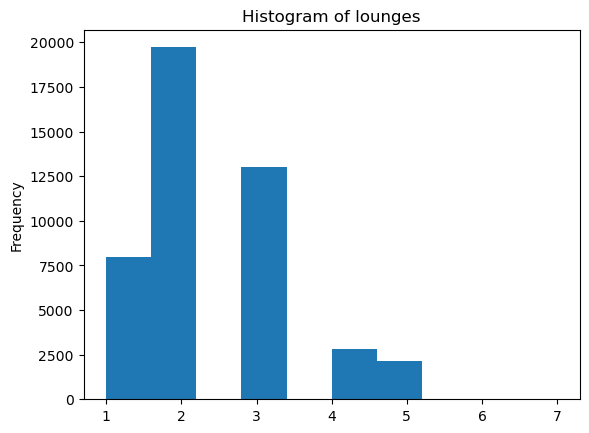

In [18]:
df['lounges'].plot(kind="hist", title="Histogram of lounges");

In [19]:
df['lounges'].var()

0.9971749884864869

In [20]:
lounges_mean = round(df['lounges'].mean())
lounges_mean

2

In [21]:
df['lounges'] = df['lounges'].fillna(lounges_mean)
df['lounges'].isnull().sum()

0

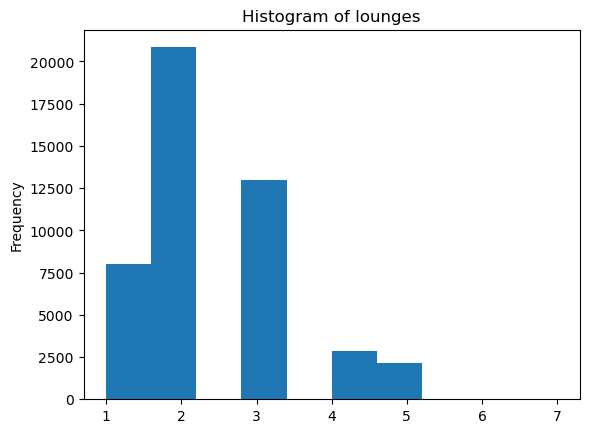

In [22]:
df['lounges'].plot(kind="hist", title="Histogram of lounges");

In [23]:
df['lounges'].var()

0.9766638290508312

In [24]:
df['lounges'].isnull().sum()

0

### streetwidth column

In [25]:
df['streetWidth'].value_counts()

20.0     19160
15.0     15392
18.0      2956
25.0      1948
16.0      1122
21.0       908
12.0       680
30.0       635
10.0       589
17.0       588
19.0       579
5.0        491
14.0       378
28.0       222
22.0       216
24.0       107
23.0        91
26.0        86
13.0        79
35.0        57
40.0        51
31.0        36
36.0        34
11.0        32
27.0        31
29.0        29
1.0         21
32.0        14
60.0        10
9.0          9
8.0          8
45.0         8
100.0        7
33.0         6
4.0          5
50.0         5
39.0         5
43.0         5
34.0         5
41.0         4
6.0          4
2.0          3
38.0         3
37.0         2
56.0         2
72.0         2
96.0         2
44.0         2
61.0         1
97.0         1
62.0         1
64.0         1
42.0         1
70.0         1
51.0         1
Name: streetWidth, dtype: int64

In [26]:
df['streetWidth'].var()

17.371107643187802

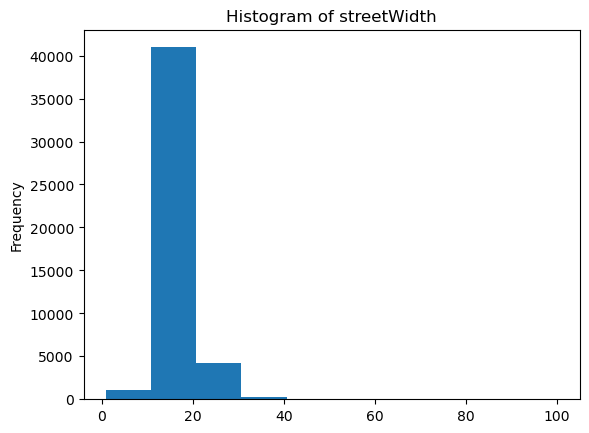

In [27]:
df['streetWidth'].plot(kind="hist", title="Histogram of streetWidth");

In [28]:
streetWidth_mean = round(df['streetWidth'].mean())
streetWidth_mean

18

In [29]:
df['streetWidth'] = df['streetWidth'].fillna(streetWidth_mean)
df['streetWidth'].isnull().sum()

0

In [30]:
df['streetWidth'].var()

17.300722987845493

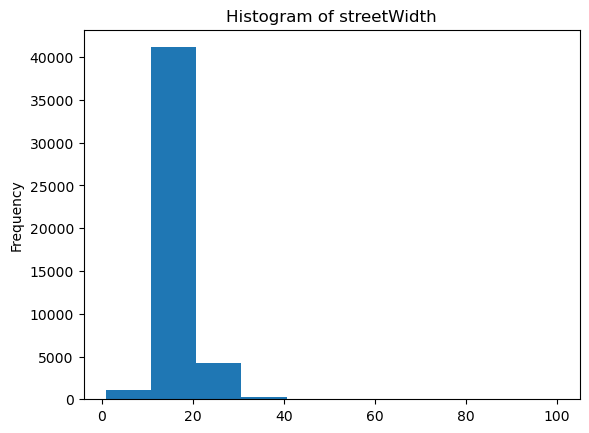

In [31]:
df['streetWidth'].plot(kind="hist", title="Histogram of streetWidth");

### price column

In [32]:
df['price'].value_counts()

1200000.0    1591
1100000.0    1440
1600000.0    1333
1300000.0    1270
1500000.0    1253
             ... 
2995000.0       1
108000.0        1
111111.0        1
1035000.0       1
855000.0        1
Name: price, Length: 672, dtype: int64

In [33]:
df['price'].var()

7739817588519.33

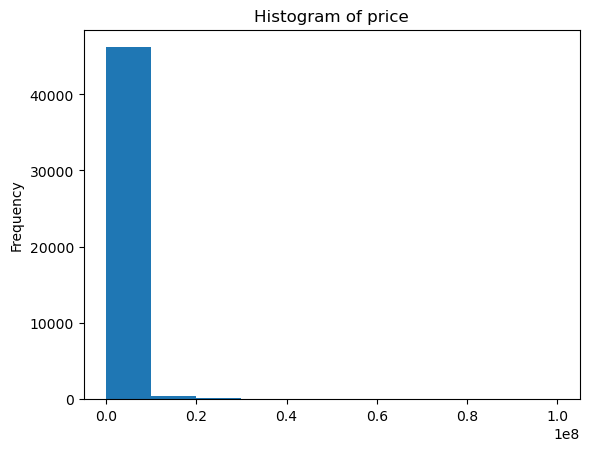

In [34]:
df['price'].plot(kind="hist", title="Histogram of price");

In [35]:
price_mean = round(df['price'].mean())
price_mean

2347636

In [36]:
df['price'] = df['price'].fillna(price_mean)
df['price'].isnull().sum()

0

In [37]:
df['price'].var()

7739487003678.742

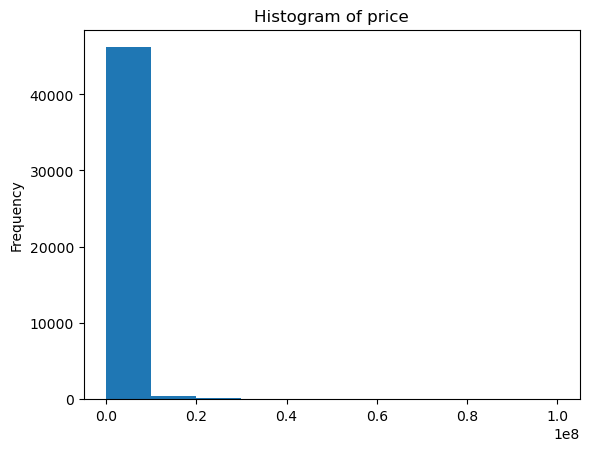

In [38]:
df['price'].plot(kind="hist", title="Histogram of price");

### square price column

In [39]:
df['square price'].value_counts()

5000.000000    1198
4000.000000     997
4166.666667     558
5500.000000     532
3333.333333     485
               ... 
4327.868852       1
2713.178295       1
9589.041096       1
6265.690377       1
3288.461538       1
Name: square price, Length: 4917, dtype: int64

In [40]:
df['square price'].var()

20392858.264719818

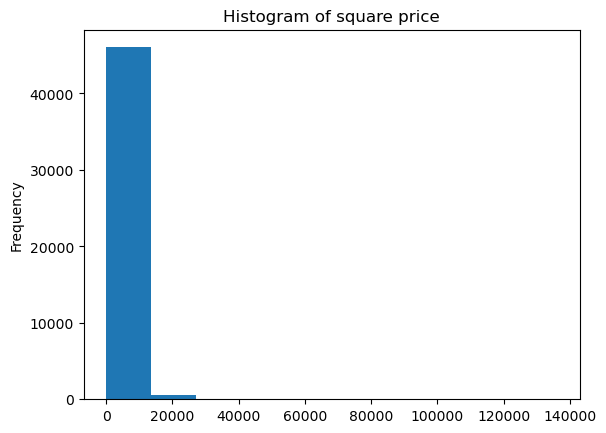

In [41]:
df['square price'].plot(kind="hist", title="Histogram of square price");

In [42]:
sqprice_mean = round(df['square price'].mean())
sqprice_mean

6088

In [43]:
df['square price'] = df['square price'].fillna(sqprice_mean)
df['square price'].isnull().sum()

0

In [44]:
df['square price'].var()

20391987.24034119

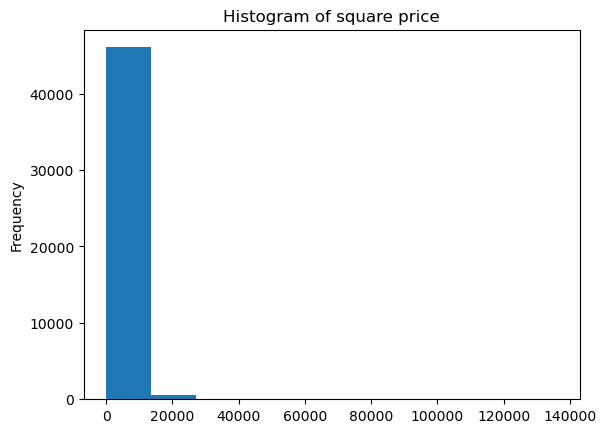

In [45]:
df['square price'].plot(kind="hist", title="Histogram of square price");

### After Handling Missing Values

In [46]:
df.isnull().sum()

front            0
rooms            0
lounges          0
bathrooms        0
streetWidth      0
stairs           0
propertyAge      0
driverRoom       0
tent             0
patio            0
kitchen          0
outdoorRoom      0
garage           0
duplex           0
space            0
apartments       0
maidRoom         0
elevator         0
furnihsed        0
pool             0
basement         0
neighbourhood    0
location         0
price            0
square price     0
dtype: int64

# Plot Heatmap

<AxesSubplot:>

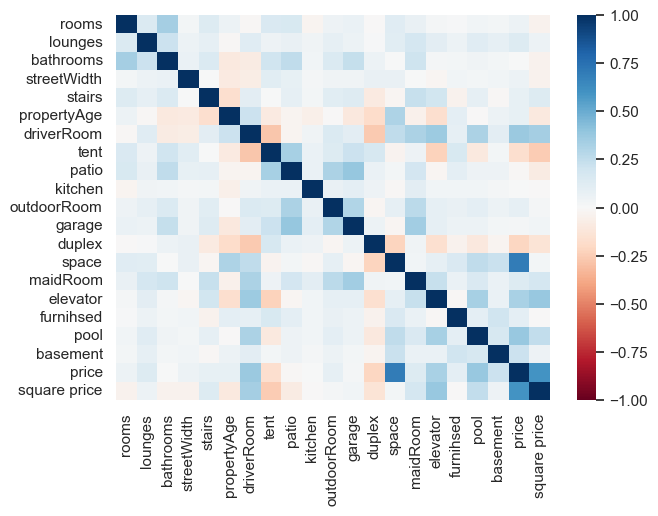

In [47]:
sns.set(rc={'figure.figsize':(7,5)}) 
sns.heatmap(df.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=False, fmt='g') 

### Sunburst chart

In [48]:
df.patio.value_counts()

1.0    36027
0.0    10799
Name: patio, dtype: int64

In [49]:
df['location'].value_counts() 

غرب الرياض     13548
شرق الرياض     12844
شمال الرياض    11254
جنوب الرياض     8960
وسط الرياض       220
Name: location, dtype: int64

In [50]:
x= df[df['location']=='شمال الرياض']
x= x[x['patio'] >=1]
x.shape

(7720, 25)

In [51]:
x= df[df['location']=='شمال الرياض']
x= x[x['patio'] >=1]
x.shape
x2=x['neighbourhood'].value_counts().to_frame('patio')
x2['location']='شمال الرياض'
x2.head(5)

,patio,location
النرجس,2231,شمال الرياض
الملقا,1322,شمال الرياض
العارض,1301,شمال الرياض
الياسمين,772,شمال الرياض
حطين,296,شمال الرياض


In [69]:
x3=x2.head(7)

In [70]:
fig = px.sunburst(x3, path=['location',x3.index,'patio'],values='patio', template='ggplot2',
                  title='The Top 7 District in Northen have patio')
fig.show()

In [71]:
pio.write_html(fig,file='fig1.html',auto_open=True)

### Bar chart for south of Riyadh

In [54]:
loc= df[df['location']=='جنوب الرياض']
n_names=loc['neighbourhood'].unique()
# n_names
data=[]
for n in n_names:
    dic={}
    mean_price= loc[loc['neighbourhood'] ==n]['price'].mean()
    dic['Location']='جنوب الرياض'
    dic['District']=n
    dic['Mean Price']=mean_price
    data.append(dic)
    
df_p=pd.DataFrame.from_dict(data) 
df_p.max()


Location      جنوب الرياض
District             نمار
Mean Price      1900000.0
dtype: object

In [55]:
fig = px.bar(df_p, x='District', y='Mean Price',
             hover_data=['District', 'Mean Price'], color='District',
             title= 'Mean Price vs District of South Of Riyadh', height=400)
fig.show()

### Bar chart for all locations of Riyadh

In [56]:
n_names=df['location'].unique()
data=[]
for n in n_names:
    dic={}
    df3= df[df['location'] ==n]
    mean_price=df3['price'].mean()
    dic['Location']=n
    dic['Mean Price']=mean_price
    dic['Square price']=df3['square price'].mean()
    
    data.append(dic)
    
df_loc=pd.DataFrame.from_dict(data) 
df_loc.head()


,Location,Mean Price,Square price
0,جنوب الرياض,1.074540e+06,3473.530661
1,غرب الرياض,1.488517e+06,4691.795445
2,شرق الرياض,2.235053e+06,5945.866581
3,شمال الرياض,4.535137e+06,10060.222910
4,وسط الرياض,1.775764e+06,3662.285567


In [57]:
fig = px.bar(df_loc, x='Location', y='Mean Price',
             hover_data=['Square price'], color='Location',
             title="The comparision of mean price over 5 locations", height=400)
fig.show()

## Dashborad

In [58]:
app = JupyterDash()

colors = {
    'background': '#7FDBFF',
    'text': '#111111'
         }

app.layout = html.Div(
    style={'backgroundColor': colors['background']},
    children = [
    html.H1('Average Prices of Riyadh Districts'),
    html.P('27-1-2023'),
    dcc.Dropdown(
                id='my-drop',
                options=[{'label':i ,'value':i} for i in df['location'].unique()],
                value='شمال الرياض' ),
    dcc.Graph(id='my-graph1'),
    dcc.Graph(id='my-graph2')

               ]
                     )
@app.callback(
Output('my-graph1', 'figure'),
Output('my-graph2', 'figure'),
Input('my-drop','value')
    
)
def update_graph(selected_geography):
#     print(selected_geography)
    loc = df[df['location']==selected_geography ]
    n_names=loc['neighbourhood'].unique()
    data=[]
    for n in n_names:
        dic={}
        mean_price= loc[loc['neighbourhood'] ==n]['price'].mean()
        dic['Location']=selected_geography
        dic['District']=n
        dic['Mean Price']=mean_price
        data.append(dic)

    df_p=pd.DataFrame.from_dict(data) 
    df_p.max()
    fig_price = px.bar(df_p, x='District', y='Mean Price',
             hover_data=['District', 'Mean Price'], color='District',
             title=  f'متوسط أسعار الفلل في {selected_geography}', height=600)
    
    #patio
    x=loc
    x= x[x['patio'] >=1]
    x2=x['neighbourhood'].value_counts().to_frame('patio')
    x2['location']=selected_geography
    x2=x2.head(8)
    fig_patio = px.sunburst(x2, path=['location',x2.index,'patio'],values='patio', template='ggplot2',
                  title=f'أكثر 8 أحياء لفلل بها فناء في {selected_geography}', height=600)
        
    return fig_price,fig_patio


if __name__ == '__main__':
    app.run_server()


OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run_server.